

# Project: No Show appointments data invistigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project the data chosen was the no show appointment. This dataset collects information
from 100k medical appointments in Brazil.
A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● Neighbourhood indicates the
location of the hospital.
● Scholarship indicates
whether or not the patient is
enrolled in Brasilian welfare
program.

>
>**In investigating this project the following questions were asked:**
>What are the characterestics of the dataset we have?
>What factors are important for us to know to predict if a patient will show up for their scheduled appointment?


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling



In [96]:

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(70)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
66,9.784893e+14,5638604,M,2016-04-29T08:12:27Z,2016-04-29T00:00:00Z,1,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
68,5.434176e+12,5552915,F,2016-04-06T18:00:29Z,2016-04-29T00:00:00Z,69,JARDIM DA PENHA,0,1,0,0,0,1,No


In [97]:
df.shape

(110527, 14)

In [98]:
df.info() 
## To check for missing values##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [99]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As shown above there is a problem in the Age column while some values are 0 and -1 which is not logical or real so it will be replaced by the mean value of ages later in the data cleaning part + the No-show column header name also the properties are shown above

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [100]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['Age'].replace(0,df['Age'].mean(),inplace=True)
df['Age'].replace(-1,df['Age'].mean(),inplace=True)
## Age values that ain't logical are replaced by mean number of ages
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.276790,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Checking for wrong values

In [101]:
df.drop(df[df['Handcap'] >= 2].index, inplace = True)
#removing values that are moe than 1 from handicappedd while this may affect the result

while some values are more than 1, so some of them should be removed

In [102]:
df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension','Handcap':'Handicapped'}, inplace = True)
df.head(70)
##renaming wrong spelled columns

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.000000,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.000000,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.000000,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.000000,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.000000,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,37.088874,CONQUISTA,0,0,0,0,0,0,No
66,9.784893e+14,5638604,M,2016-04-29T08:12:27Z,2016-04-29T00:00:00Z,1.000000,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,37.088874,NOVA PALESTINA,0,0,0,0,0,0,No
68,5.434176e+12,5552915,F,2016-04-06T18:00:29Z,2016-04-29T00:00:00Z,69.000000,JARDIM DA PENHA,0,1,0,0,0,1,No


renaming wrong spelled columns

Columns with wrong spelling are renamed

In [103]:
## The PatientId','AppointmentID','ScheduledDay','AppointmentDay' columns were removed while they are not related to the purpose of this data invistigation
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56.0,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51.0,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21.0,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38.0,MARIA ORTIZ,0,0,0,0,0,1,No


The 'PatientId','AppointmentID','ScheduledDay','AppointmentDay' columns were removed while they are not related to the purpose of this data invistigation.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What are the characterestics of the data??

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicapped'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

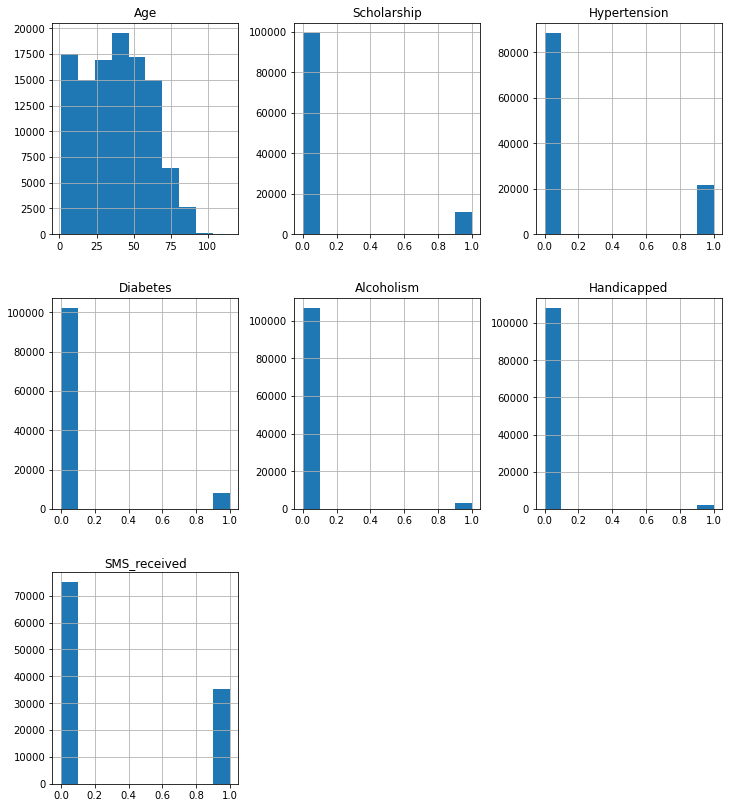

In [104]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(12,14))

**As shown above:**
<ul>
    <li>Nearly half of the patients recieved sms.</li>
    <li>Nearly 20 percent of the patients got hypertensiom.</li>
    <li>More than 90 percent of them ain't handicapped or suffering from diabetes.</li>
    <li>More than 90 percent of the patients dont suffer from alcoholism.</li>
    <li>Nearly one tenth of the of the patients are from welfare program</li>
</ul>

In [105]:
##Assigning values for analyzing and visualizing data to determine relation and also to avoid confusion
Show=df['No_show']=='No'
No_Showed=df['No_show']=='Yes'

Assigning values for analyzing and visualizing data to determine relation and also to avoid confusion

### How is the relation of each variable of the collected data to showing or not showing??

In [106]:
df[Show].count(), df[No_Showed].count()

(Gender           88050
 Age              88050
 Neighbourhood    88050
 Scholarship      88050
 Hypertension     88050
 Diabetes         88050
 Alcoholism       88050
 Handicapped      88050
 SMS_received     88050
 No_show          88050
 dtype: int64,
 Gender           22278
 Age              22278
 Neighbourhood    22278
 Scholarship      22278
 Hypertension     22278
 Diabetes         22278
 Alcoholism       22278
 Handicapped      22278
 SMS_received     22278
 No_show          22278
 dtype: int64)

Checking the overall number of showing and not showing in every column

In [107]:
##function to count for values
def count(df,column_head,Show,No_Showed):
    Dict={'No Show': df[column_head][No_Showed].value_counts() ,'Showed': df[column_head][Show].value_counts()}
    Table_View=pd.DataFrame.from_dict(Dict)
    print(Table_View)

Setting up the function to display the count of every parameter.

In [108]:
## Function to plot histogram for values and seeing their relationship to showing or not showing
def Histogramming(df,column_head,Show,No_Showed):
    df[column_head][Show].hist(figsize=(8,8), label='Showed')
    df[column_head][No_Showed].hist(figsize=(8,8), label=" Didn't Show ")
    plt.xlabel(column_head)
    plt.ylabel('Number of Patients')
    plt.title(f'Number of Patients VS {column_head}')
    plt.legend();

Setting up the function to display the graph for every parameter. 

### **Checking relation to Age**

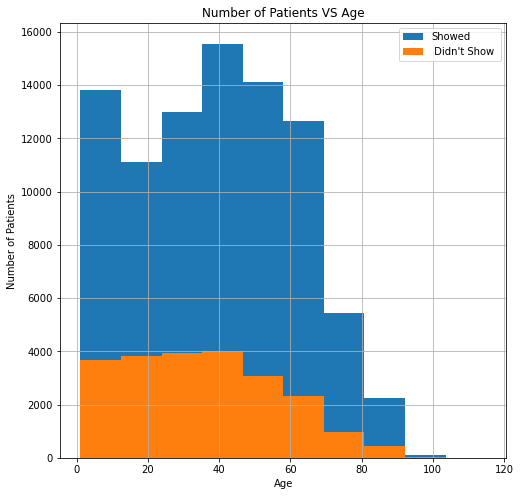

In [109]:
##Checking relation of showing to Age
Histogramming(df,'Age',Show,No_Showed)

**As shown above:**
<ul>
    <li>Patients of age from 40 to 60 tend to show for their appointments more than other age sets or groups.</li>
    <li>Older age groups tend less to get an appointment more than other age groups.</li>
    <li>The older the patient is the less likely he is to book an appointment.</li>
</ul>

### **Checking relation to Gender**

In [110]:
count(df,'Gender',Show,No_Showed)

   No Show  Showed
F    14568   57163
M     7710   30887


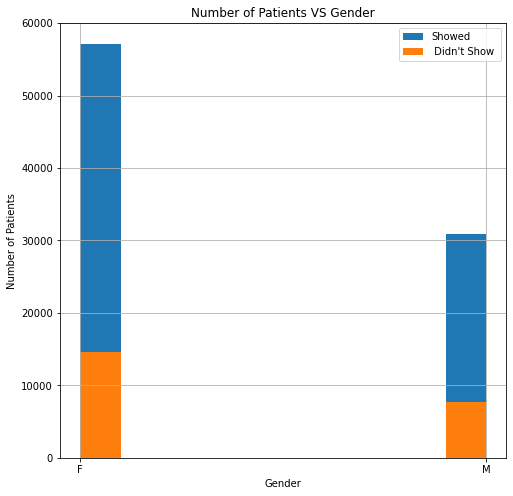

In [111]:
Histogramming(df,'Gender',Show,No_Showed)

**As shown above**
<li>Gender has no real significance on showing in the appointment while for the percentage of patents who showed and didn't show in both males and females are nearly same.</li>

### **Checking relation to being handicapped**

In [112]:
count(df,'Handicapped',Show,No_Showed)

   No Show  Showed
0    21912   86374
1      366    1676


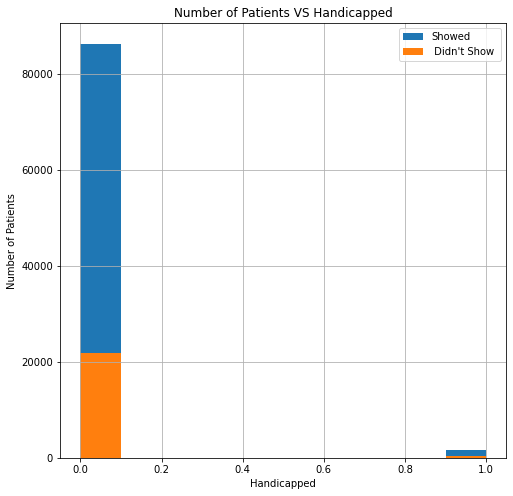

In [113]:
Histogramming(df,'Handicapped',Show,No_Showed)

**As shown above**
<li>Being handicapped doesnt't have a big significance since the percentage of patients that showed in both are very close </li>

### **Checking relation to being in the brazilian welfare program**

In [114]:
count(df,'Scholarship',Show,No_Showed)

   No Show  Showed
0    19701   79784
1     2577    8266


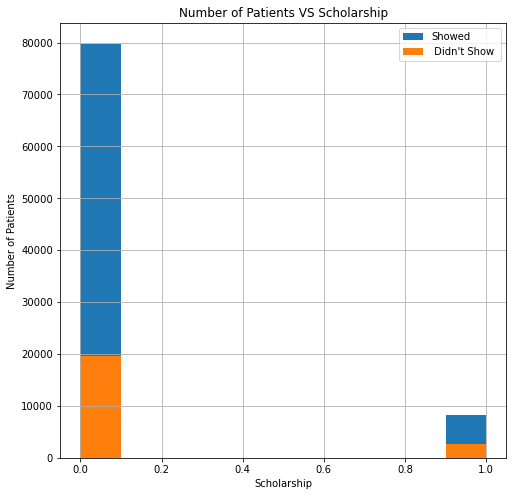

In [115]:
 Histogramming(df,'Scholarship',Show,No_Showed)

<li>Being under the welfare program of Brazil doesnt't have a big significance since the percentage of patients that showed in both is nearly same.</li>

As shown in the figure and count above the percentages of showing are nearly same for patients under the welfare program which means that it is not significant in determining or predicting if the patient will show to the appointment

### Checking relation to having Diabetes

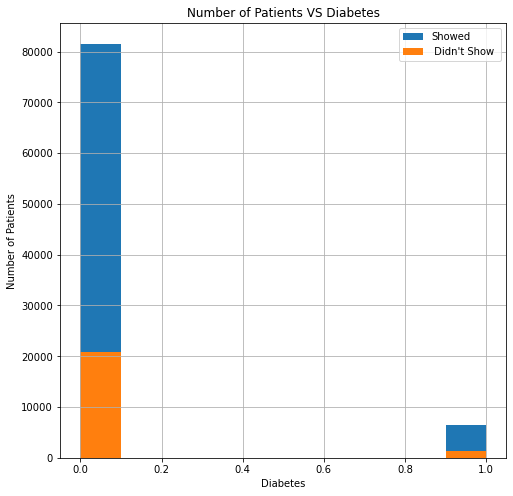

In [116]:
 Histogramming(df,'Diabetes',Show,No_Showed)

In [117]:
count(df,'Diabetes',Show,No_Showed)

   No Show  Showed
0    20856   81572
1     1422    6478


<li>There is no big significance for Diabetes also while the percentages are nearly close as shown in the histogram above</li>

### Checking relation to Alcoholism

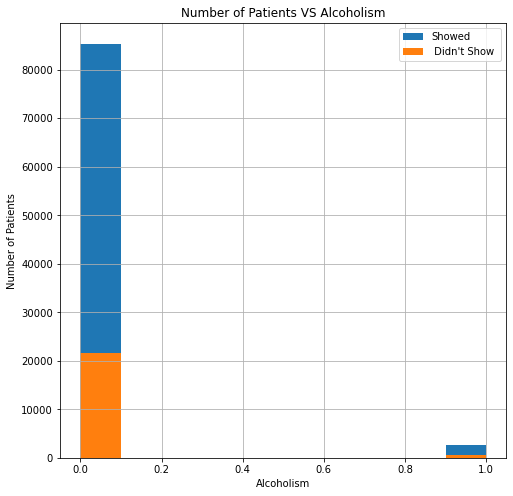

In [118]:
 Histogramming(df,'Alcoholism',Show,No_Showed)

In [119]:
count(df,'Alcoholism',Show,No_Showed)

   No Show  Showed
0    21603   85373
1      675    2677


There is no big significance for Alcoholism while percentage of both is same.

### Checking relation to Hypertension

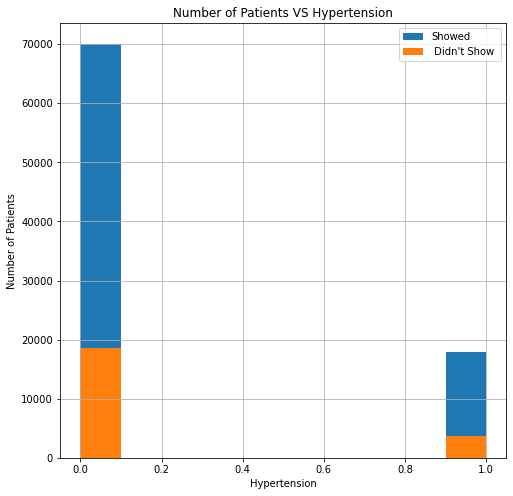

In [120]:
 Histogramming(df,'Hypertension',Show,No_Showed)

In [121]:
count(df,'Hypertension',Show,No_Showed)

   No Show  Showed
0    18530   70082
1     3748   17968


<li>There is also here no Significance, while difference in percentages is very small</li>

### Checking relation to Neighbourhead Area

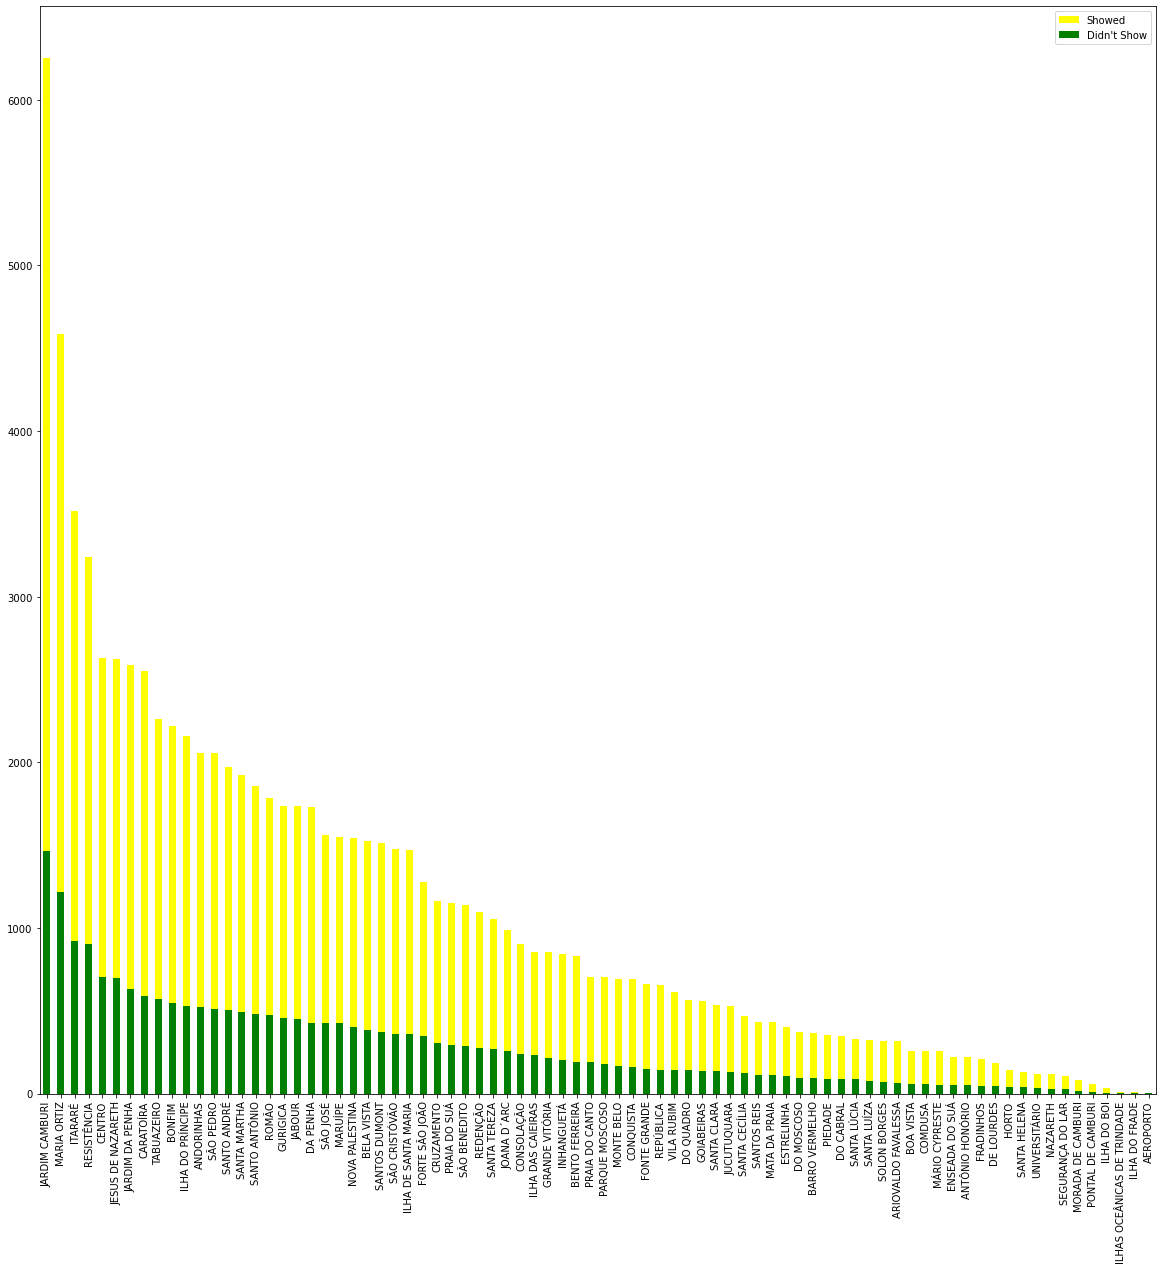

In [122]:
df.Neighbourhood[Show].value_counts().plot(kind='bar', color='yellow',figsize=(20,20), label='Showed')
df.Neighbourhood[No_Showed].value_counts().plot(kind='bar',color='green', figsize=(20,20), label="Didn't Show")
plt.legend();

<li>JARDIM CAMBURI was the area with the highest number of patients and also the percentage of non-showing patiets is considered low when compared to other neighbourhoods, which means that there is a significance of the neighbourhood and the number of patients showing</li>

### Checking relation to SMS Sent

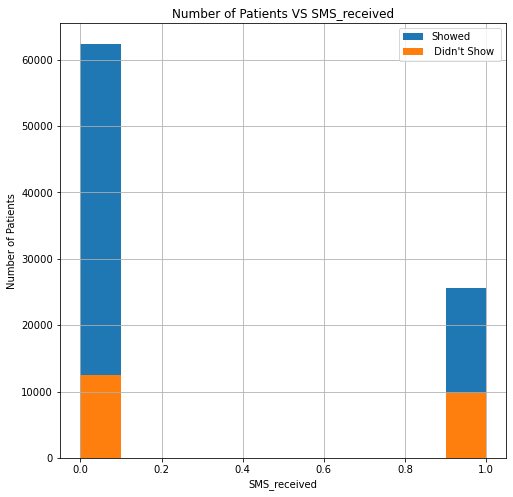

In [123]:
Histogramming(df,'SMS_received',Show,No_Showed)

In [124]:
count(df,'Alcoholism',Show,No_Showed)


   No Show  Showed
0    21603   85373
1      675    2677


<li>The percentage and number of showing is higher for the patients that didn't recieve SMS messages than for the ones who recieved.</li> 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

**In Conclusion:**
<ul>
<li>The percentage and number of showing is higher for the patients that didn't recieve SMS messages than for the ones who recieved which means that there is something rightthere to be checked and revised by a specialist to grasp a bettter understanding of this phenomena and find solution if there is a problem.</li>
<li>Neighbourhood has also been found to have a big significance and maybe further information related to each area such as: (Population density, urbanization.. etc.) may help to get better knowledge.</li>
<li>Age has also shown a significance rule, while patients of age from 40 to 60 tend to show for their appointments more than other age sets or groups.</li>
</ul>

**Limitations of the data**
<ul>
    <li>Further data needs to be collected and analyzed about possible factors that may contribute to the results (Population density at every clinic area etc.).</li>
    <li>Surprisingly type of disease, Scholarship, and being handicapped didn't show a significanct difference, however, maybe more investigation needs to be conducted and further information need to be collected to understand better these phenomenas.</li>
</ul>